In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import  preprocessing
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [208]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [209]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(0, 0.0001)
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

In [210]:
mainpath="../NSL-KDD/"
transformed_datasets_folder = "transformed_datasets/"
file_normal_traffic = "normal_traffic.csv"
file_anomaly_traffic = "anomaly_traffic.csv"

csv_normal_traffic_path = mainpath + transformed_datasets_folder + file_normal_traffic
csv_anomaly_traffic_path = mainpath + transformed_datasets_folder + file_anomaly_traffic

In [211]:
df_normal_traffic = pd.read_csv(csv_normal_traffic_path)
df_normal_traffic.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0.0,1,24,9,287.0,2251.0,0,0.0,0.0,0.0,...,219.0,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0


In [212]:
df_anomaly_traffic = pd.read_csv(csv_anomaly_traffic_path)
df_anomaly_traffic.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
1,0.0,1,49,1,0.0,0.0,0,0.0,0.0,0.0,...,19.0,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,1
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,9.0,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
3,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,15.0,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,1
4,0.0,1,51,5,0.0,0.0,0,0.0,0.0,0.0,...,23.0,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1


In [213]:
np_array = df_normal_traffic.to_numpy()
class_label = np_array[:, -1] # for last column
data = np_array[:, :-1] # for all but last column

In [214]:
X_train, X_test, y_train, y_test = train_test_split(data, class_label, test_size=0.1, random_state=42)
print(len(data))
print(len(X_train))

77054
69348


In [215]:
# 0,9*0,23 = 0,207
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.23, random_state=42)
print(len(X_val))
print(len(X_train))

15951
53397


In [216]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [217]:
X_train = preprocessing.normalize(X_train,norm='l2')
X_test = preprocessing.normalize(X_test,norm='l2')
X_val = preprocessing.normalize(X_val,norm='l2')

In [218]:
# Parametros de la red
batch_size = 64
epochs = 50
encoder_layer_1 = 25
encoder_layer_2 = 8
latent_layer = 3
decoder_layer_1 = encoder_layer_1
decoder_layer_2 = encoder_layer_2
num_labels = len(np.unique(y_train, return_counts=False))
data_dimention = data.shape[1]
activation_type = "relu"
kernel_init = "glorot_uniform"
patience = 5
regularization_parameter = 0.0001
dropout_parameter = 0.4

In [219]:
model = Sequential([
    Dense(encoder_layer_1, input_dim=data_dimention, activation=activation_type
          #kernel_regularizer=tf.keras.regularizers.l1(regularization_parameter)
      ),
    #Dropout(dropout_parameter),
    #Dense(encoder_layer_2, activation=activation_type, kernel_initializer=kernel_init, 
    #      kernel_regularizer=tf.keras.regularizers.l1(regularization_parameter) 
    #),
    Dense(latent_layer, activation=activation_type
    #      kernel_regularizer=tf.keras.regularizers.l1(regularization_parameter) 
    ),
    #Dropout(dropout_parameter),
    #Dense(decoder_layer_1, activation=activation_type, kernel_initializer=kernel_init, 
    #      kernel_regularizer=tf.keras.regularizers.l1(regularization_parameter) 
    #),
    #Dropout(dropout_parameter),
    Dense(decoder_layer_1, activation=activation_type
          #kernel_regularizer=tf.keras.regularizers.l1(regularization_parameter) 
    ),
    Dense(data_dimention)
])

In [220]:
model.compile(loss='mean_squared_error', optimizer="adam")

In [221]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)

In [222]:
history = model.fit(X_train, y_train, 
              epochs=epochs, 
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              callbacks=[es]
          )

Epoch 1/50
835/835 [==============================] - 8s 9ms/step - loss: 0.0570 - val_loss: 2.0531e-04
Epoch 2/50
835/835 [==============================] - 8s 9ms/step - loss: 1.3441e-04 - val_loss: 7.1733e-05
Epoch 3/50
835/835 [==============================] - 8s 9ms/step - loss: 5.6982e-05 - val_loss: 3.7188e-05
Epoch 4/50
835/835 [==============================] - 10s 12ms/step - loss: 3.3093e-05 - val_loss: 2.3624e-05
Epoch 5/50
835/835 [==============================] - 6s 8ms/step - loss: 2.2154e-05 - val_loss: 1.7019e-05
Epoch 6/50
835/835 [==============================] - 7s 9ms/step - loss: 1.5500e-05 - val_loss: 1.2100e-05
Epoch 7/50
835/835 [==============================] - 13s 16ms/step - loss: 1.1188e-05 - val_loss: 1.1960e-05
Epoch 8/50
835/835 [==============================] - 7s 8ms/step - loss: 8.4315e-06 - val_loss: 6.9430e-06
Epoch 9/50
835/835 [==============================] - 6s 8ms/step - loss: 6.5682e-06 - val_loss: 4.8695e-06
Epoch 10/50
835/835 [=======

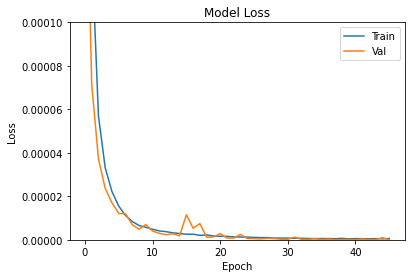

In [223]:
plot_loss(history)

In [224]:
np_anomaly_array = df_anomaly_traffic.to_numpy()
X_anomaly = np_anomaly_array[:, :-1] # for all but last column

In [225]:
pred = model.predict(X_test)
score1 = np.sqrt(mean_squared_error(pred,X_test))
pred = model.predict(X_train)
score2 = np.sqrt(mean_squared_error(pred,X_train))
pred = model.predict(X_anomaly)
score3 = np.sqrt(mean_squared_error(pred,X_anomaly))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Attack Underway Score (RMSE): {score3}")

Out of Sample Normal Score (RMSE): 0.9742268955075185
Insample Normal Score (RMSE): 0.9741957837436694
Attack Underway Score (RMSE): 1934042.8343757344
